In [ ]:
## Lab - Decision Tree

In [1]:
## Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading the dataset
df = pd.read_csv("./sample_data/data.csv")

## Top 5 values
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## Columns in dataset
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
## Checking the data types
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [7]:
## Printing the dimension of data
df.shape

(891, 12)

In [9]:
## Summary Statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
## Printing number of missing values in each column
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


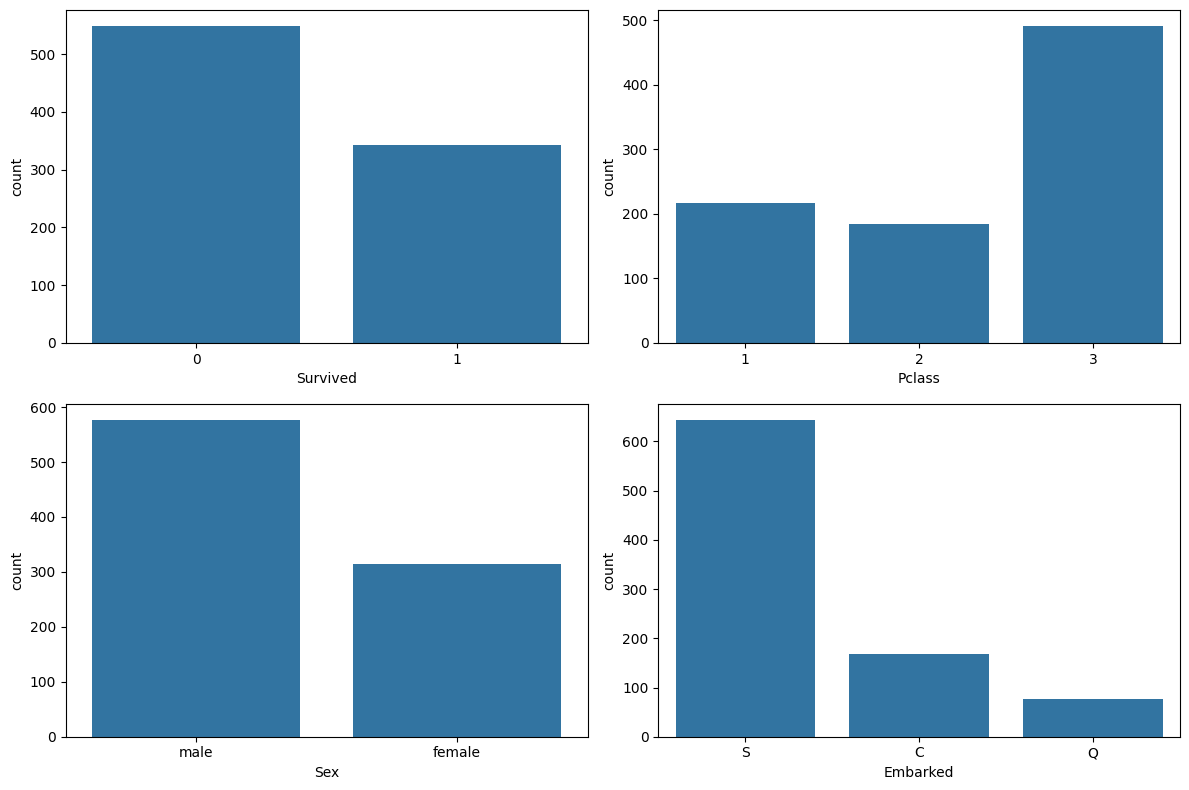

In [11]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(x="Survived", data=df)

plt.subplot(2,2,2)
sns.countplot(x="Pclass", data=df)

plt.subplot(2,2,3)
sns.countplot(x="Sex", data=df)

plt.subplot(2,2,4)
sns.countplot(x="Embarked", data=df)

plt.tight_layout()
plt.show()


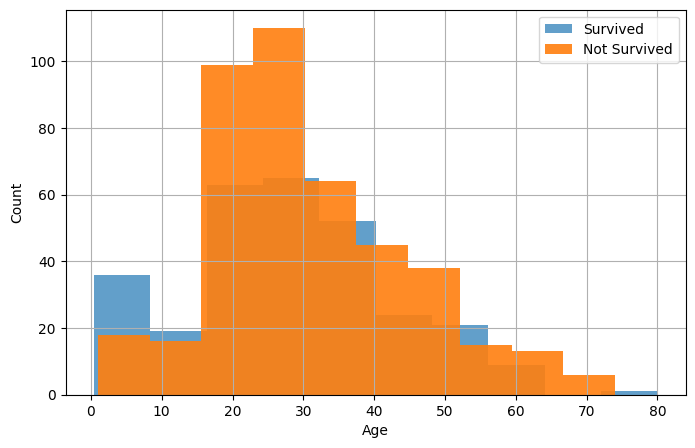

In [20]:
## Histogram of Age for Survived and No Survived
plt.figure(figsize=(8,5))
df[df["Survived"]==1]["Age"].hist(alpha=0.7, label="Survived")
df[df["Survived"]==0]["Age"].hist(alpha=0.9, label="Not Survived")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [21]:
## Replace Missing values in Embarked with 'S'
df["Embarked"].fillna("S", inplace=True)

/tmp/ipython-input-1383982828.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna("S", inplace=True)


In [22]:
## Cokmplete Missing Fare with median value
df["Fare"].fillna(df["Fare"].median(), inplace=True)


/tmp/ipython-input-3700927822.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fare"].fillna(df["Fare"].median(), inplace=True)


In [23]:
## Impute/Fill the age with same mean and std

age_mean = df["Age"].mean()
age_std = df["Age"].std()

missing_age_count = df["Age"].isnull().sum()

import numpy as np
random_ages = np.random.normal(age_mean, age_std, missing_age_count)

df.loc[df["Age"].isnull(), "Age"] = random_ages


In [24]:
## Age with same mean and std

age_mean = df["Age"].mean()
age_std = df["Age"].std()

missing_age_count = df["Age"].isnull().sum()

random_ages = np.random.normal(age_mean, age_std, missing_age_count)

df.loc[df["Age"].isnull(), "Age"] = random_ages


In [25]:
## Creation of Family

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

In [26]:
## Creation of IsAlone Features

df["IsAlone"] = 0
df.loc[df["FamilySize"] == 1, "IsAlone"] = 1

In [27]:
## Dropping unneccessary columns
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)


In [28]:
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,2,0
1,1,1,female,38.0,1,0,71.2833,C,2,0
2,1,3,female,26.0,0,0,7.9250,S,1,1
3,1,1,female,35.0,1,0,53.1000,S,2,0
4,0,3,male,35.0,0,0,8.0500,S,1,1


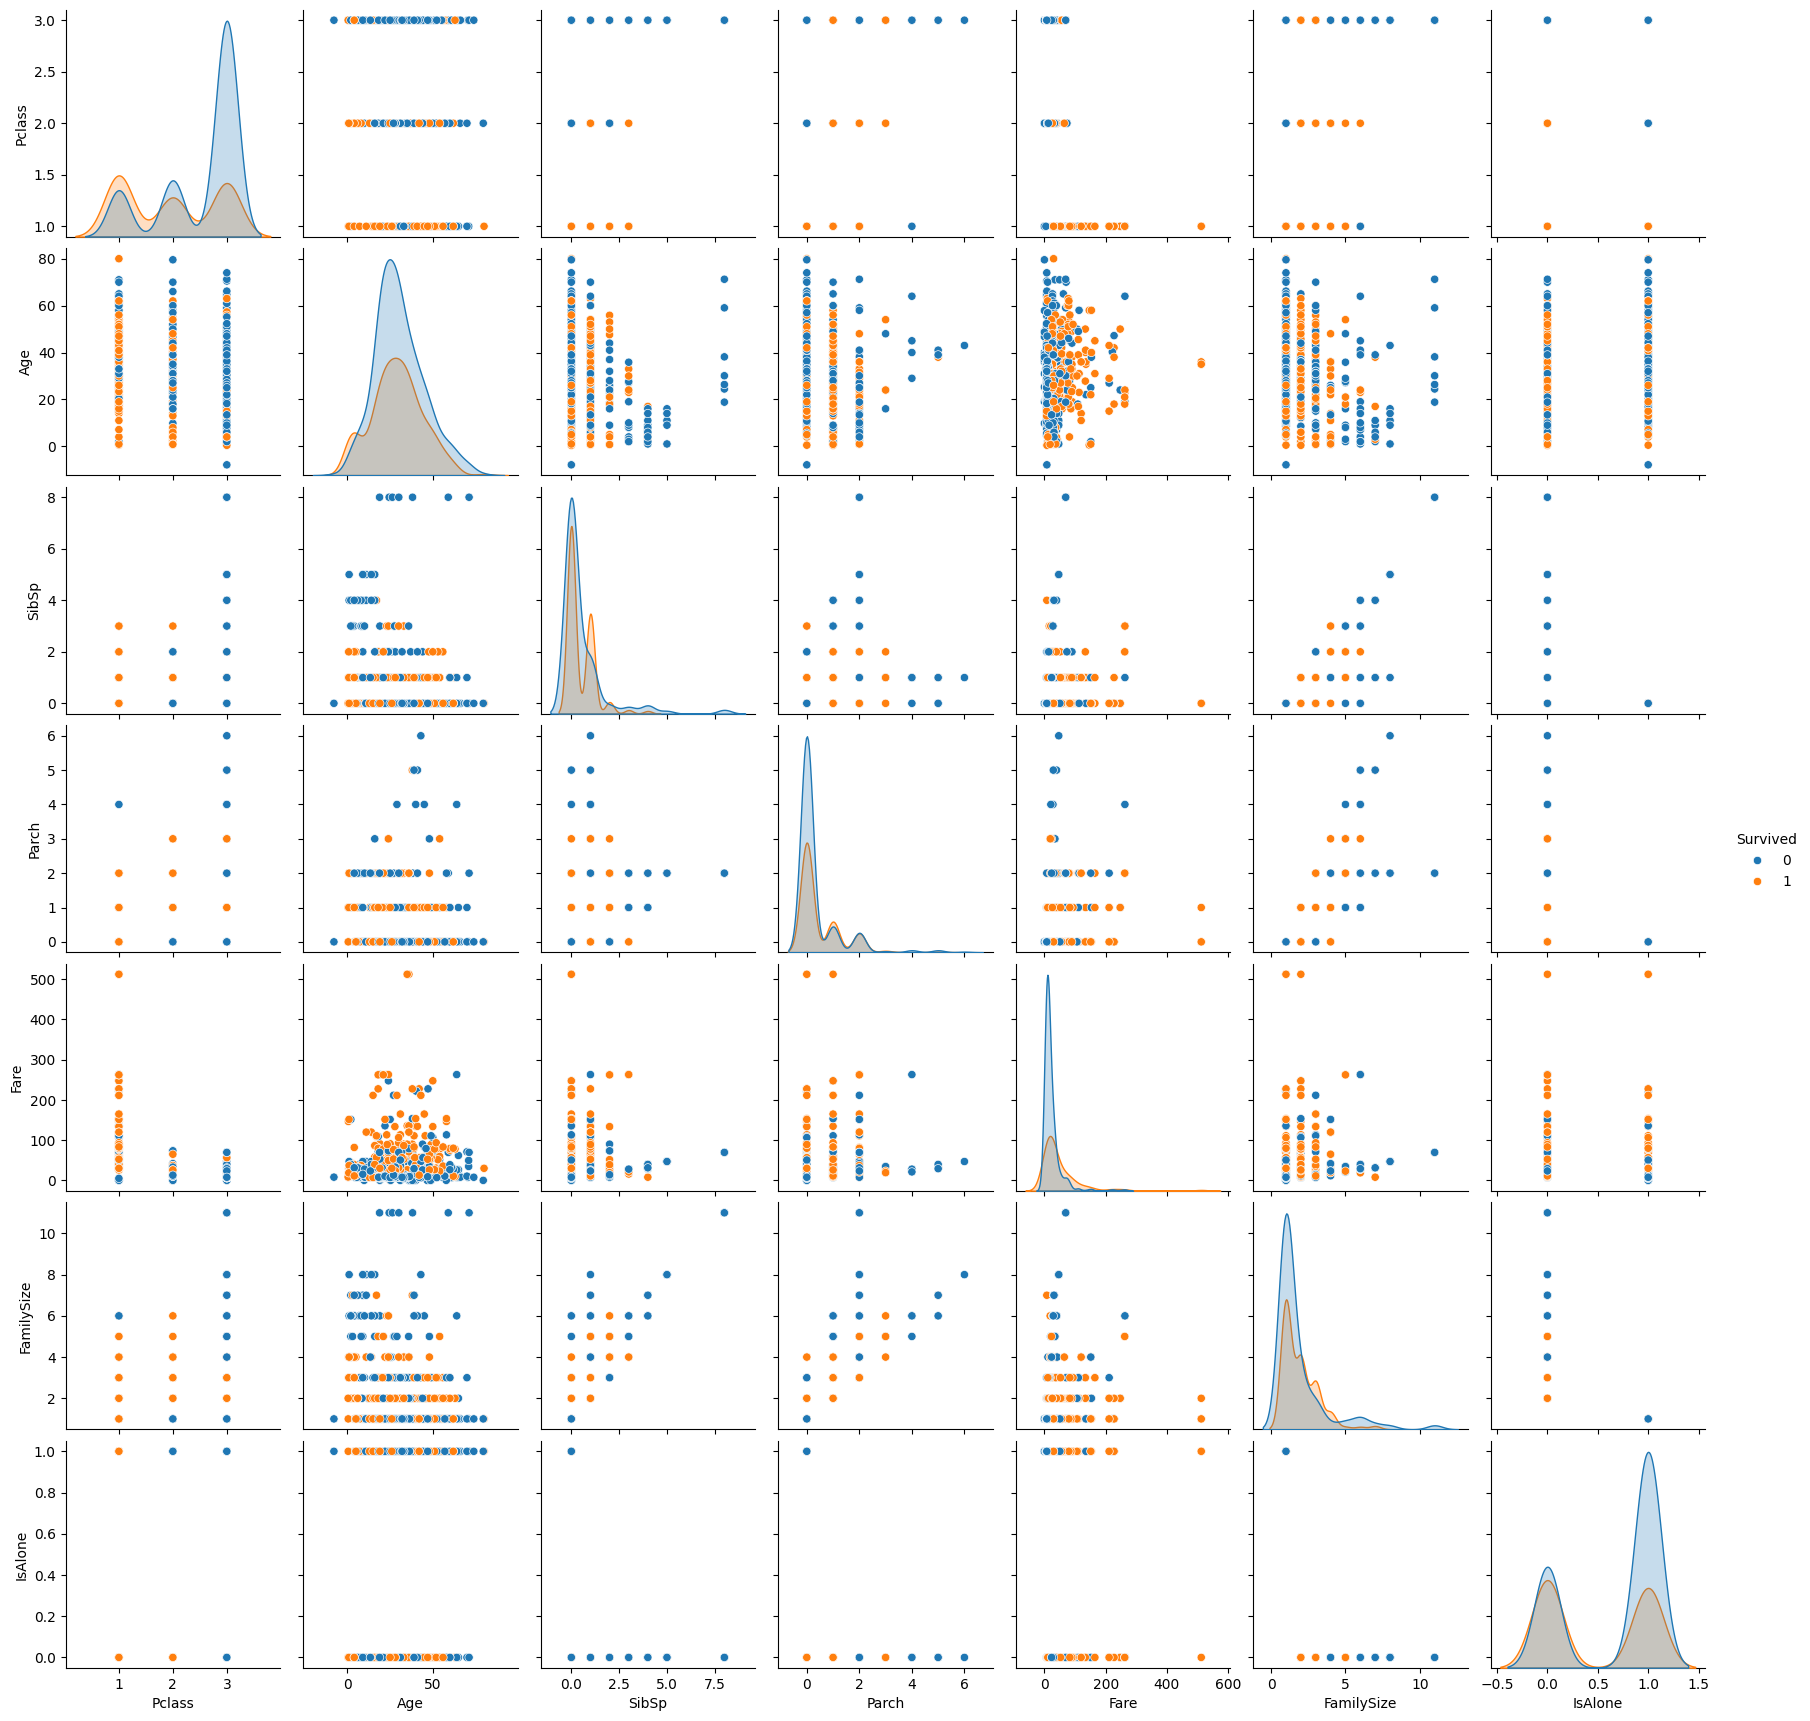

In [31]:
## Pair plot
sns.pairplot(df, hue="Survived")
plt.show()


In [32]:
## Prepare X and Y

X = df.drop("Survived", axis=1)
y = df["Survived"]


In [34]:
## Conversion of categorical variables to numeric
X = pd.get_dummies(X, drop_first=True)
print(X)


     Pclass        Age  SibSp  Parch     Fare  FamilySize  IsAlone  Sex_male  \
0         3  22.000000      1      0   7.2500           2        0      True   
1         1  38.000000      1      0  71.2833           2        0     False   
2         3  26.000000      0      0   7.9250           1        1     False   
3         1  35.000000      1      0  53.1000           2        0     False   
4         3  35.000000      0      0   8.0500           1        1      True   
..      ...        ...    ...    ...      ...         ...      ...       ...   
886       2  27.000000      0      0  13.0000           1        1      True   
887       1  19.000000      0      0  30.0000           1        1     False   
888       3  13.422157      1      2  23.4500           4        0     False   
889       1  26.000000      0      0  30.0000           1        1      True   
890       3  32.000000      0      0   7.7500           1        1      True   

     Embarked_Q  Embarked_S  
0        

In [35]:
## Splitting into Training and Validation DataSet
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [36]:
## Creation of the Model

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)


In [37]:
## Fit the Decision Tree

dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

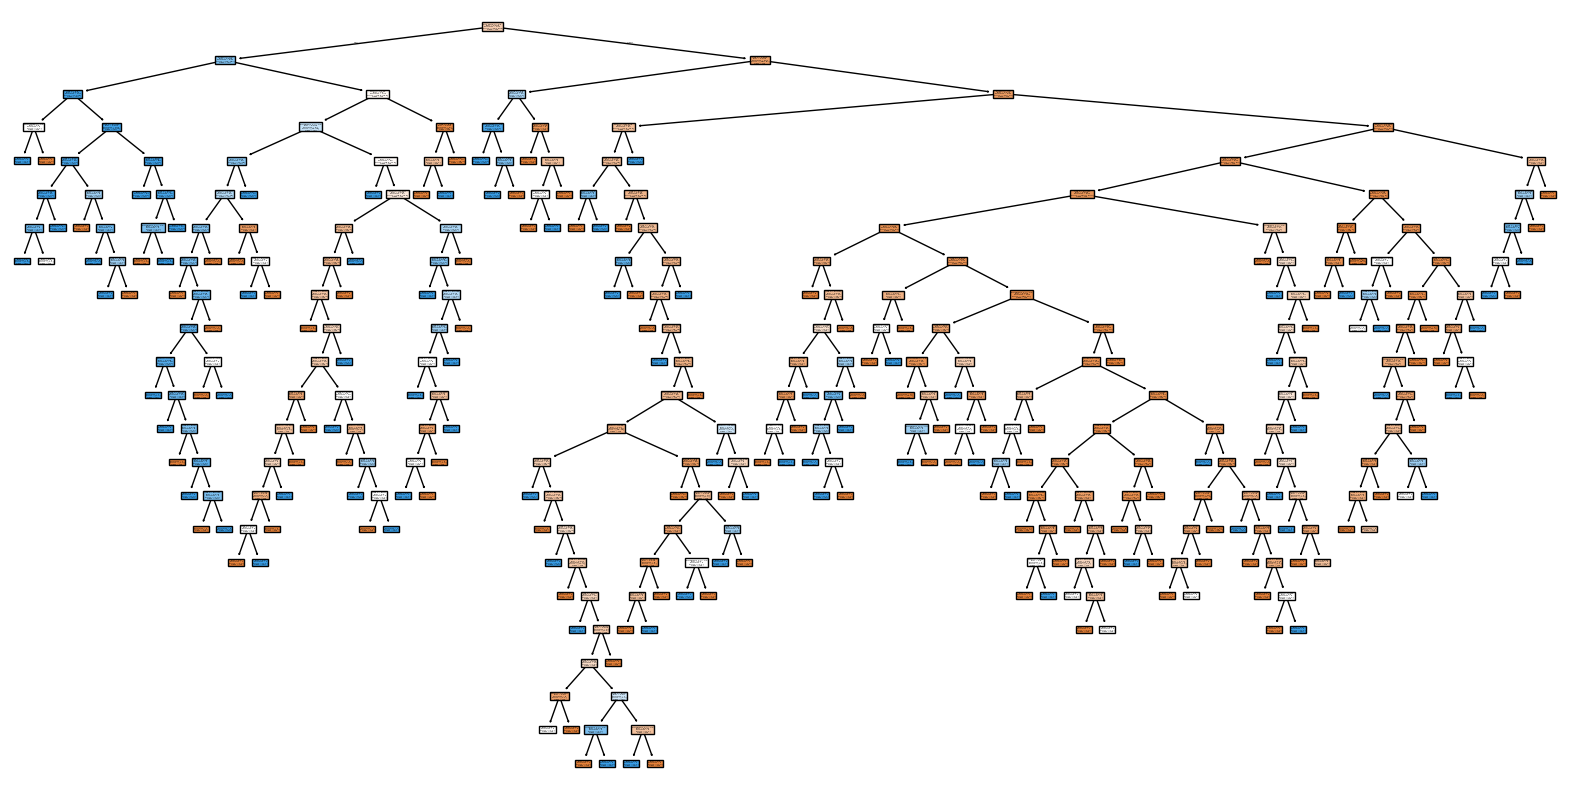

In [38]:
## Printing of tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()


In [39]:
## Importing Eval Metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make Predictions

y_pred = dt.predict(X_val)

# Print Classification Report

print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.77      0.79       105
           1       0.69      0.73      0.71        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.76       179



In [40]:
## GridSearch CV(Hyperparameter Tuning)
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [2,3,4,5,6,7,8,9,10]
}
cv_folds = 5
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=cv_folds,
    scoring="accuracy"
)
grid.fit(X_train, y_train)
print("Best CV Score:", grid.best_score_)

Best CV Score: 0.814586821629075


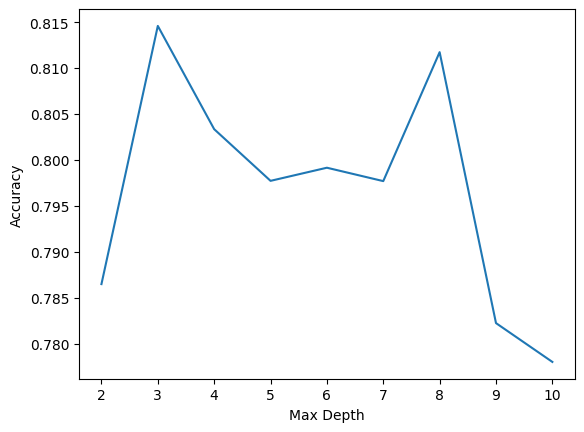

In [41]:
## Plotting Accuracy vs Max_Depth

plt.plot(param_grid["max_depth"], grid.cv_results_["mean_test_score"])
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()


In [43]:
## Creation of the Optimal Model

best_dt = DecisionTreeClassifier(
    max_depth=grid.best_params_["max_depth"],
    min_samples_leaf=5,
    min_samples_split=10,
    random_state=42
)

## Fit the Optimal Model

best_dt.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [44]:
## Evalution of Model

y_pred_best = best_dt.predict(X_val)

print(classification_report(y_val, y_pred_best))
print(confusion_matrix(y_val, y_pred_best))
print("Accuracy:", accuracy_score(y_val, y_pred_best))


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

[[92 13]
 [23 51]]
Accuracy: 0.7988826815642458
